In [1]:
pip install selenium pandas beautifulsoup4 numpy pandas keras scikit-learn tensorflow torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00


In [2]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import time

In [3]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

In [4]:
URLs=[]
j="https://www.rozee.pk/job/jsearch/q/all/fpn/"
for i in range(0,20,20):
  j=j+str(i)
  URLs.append(j)
  print(j)
  j="https://www.rozee.pk/job/jsearch/q/all/fpn/"

Titles=[]
Urls=[]
Skills=[]

https://www.rozee.pk/job/jsearch/q/all/fpn/0


In [ ]:
driver = web_driver()
for url in URLs:
  driver.get(url)

# Wait for the page to load (you may need to adjust the waiting time)
  driver.implicitly_wait(10)

# Get the page source after it has fully loaded
  page_source = driver.page_source

# Use BeautifulSoup to parse the HTML
  soup = BeautifulSoup(page_source, 'html.parser')

# Extract job titles
  job_titles = [title.text.strip() for title in soup.find_all('h3', class_='s-18')]

# Find all <h3> tags with the class 's-18' urls
  h3_tags = soup.find_all('h3', class_='s-18')

# Find Skills
  div_tag = soup.find_all('div', class_='jcnt font16')

  for title, h3_tag,a in zip(job_titles, h3_tags,div_tag):
    Titles.append(title)

    job_link = h3_tag.a['href']
    Urls.append(job_link)

    skills = [span.text.strip() for span in a.find_all('span', class_='label label-default float-left mr-2 font16 h42px br7 d-flex align-items-center')]
    Skills.append(skills)

In [ ]:
for a,b,c in zip(Titles,Urls,Skills):
    print("Job Title:", a)
    print("Job Link:", b)
    print("Skills:", c)
    print("=" * 50)

In [5]:
import pandas as pd

In [ ]:
data = {'Job Title': Titles, 'Skills': Skills}
df = pd.DataFrame(data)

In [7]:
df = pd.read_csv("final.csv")

In [ ]:
df.head()

,Job Title,Skills
0,Programmer,C++
1,Programmer,Java
2,Programmer,Python
3,Programmer,HTML
4,Programmer,CSS


In [8]:
# Removes Empty Columns
df = df[df['Skills'].apply(lambda x: bool(x))]

In [9]:
df.to_csv("Output.csv",index=False)

In [10]:
df=pd.read_csv("Output.csv")
dff=pd.read_csv("final.csv")

In [ ]:
dff.head()

,Job Title,Skills
0,Programmer,C++
1,Programmer,Java
2,Programmer,Python
3,Programmer,HTML
4,Programmer,CSS


In [11]:
bow=[]
text_data = df['Skills']
#print(text_data)
for i in text_data:
  for j in i.split(','):
    bow.append(j)
len(bow)

5955

In [12]:
cleaned_bow = [s.replace("[", "").replace("]", "").replace("'", "") for s in bow]

cleaned_bow_no_spaces = [s.lstrip() for s in cleaned_bow]

bow = cleaned_bow_no_spaces

len(bow)

5955

In [ ]:
new_rows = []

for index, row in df.iterrows():
    job_title = row['Job Title']
    skills = row['Skills']

    for skill in skills.split(','):
        cleaned_skill = skill.replace("[", "").replace("]", "").replace("'", "").lstrip()
        new_rows.append({'Job Title': job_title, 'Skills': cleaned_skill})

new_df = pd.DataFrame(new_rows)

# Display the new DataFrame
print(new_df['Skills'])
#print(new_df)
new_df.to_csv('new.csv')

In [14]:
df = pd.concat([dff, new_df], ignore_index=True)
df.to_csv('combined.csv', index=False)

In [15]:
# Make a list which contains Job_tites and its Occurance
job = df['Job Title'].value_counts()
job_title_count_list = [(title, count) for title, count in zip(job.index, job)]
print(job_title_count_list)

[('Doctor', 906), ('Software Engineer', 896), ('Banker', 842), ('Mechanical Engineer', 796), ('Digital Marketing', 796), ('Network Engineer', 784), ('Civil Engineer', 722), ('Freelancer', 688), ('Accountant', 680), ('Programmer', 676), ('Stocks Expert', 640), ('Ethical Hacker', 526), ('Purchase Manager', 490), ('Architect', 424), ('Data Scientist', 418), ('Electrical Engineer', 410), ('HR Manager', 386), ('Crypto Expert', 306), ('UX/UI Designer', 292), ('Chemical Engineer', 230), ('Job_Title', 2)]


In [16]:
dfe = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Write the updated DataFrame to a new CSV file
output_file_path = 'combined.csv'
dfe.to_csv(output_file_path, index=False)
dfe.head()

,Job Title,Skills
0,programmer,c++
1,programmer,java
2,programmer,python
3,programmer,html
4,programmer,css


In [ ]:
# dfe = pd.read_csv("final.csv")
# dfe = dfe.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [ ]:
# NAIVE BAYES

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
train_skills, test_skills, train_labels, test_labels = train_test_split(dfe['Skills'], dfe['Job Title'], test_size=0.2, random_state=42)

# Convert the skills into a TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_skills)
X_test_tfidf = tfidf_vectorizer.transform(test_skills)

# Train the Naive Bayes classifier with TF-IDF representation
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, train_labels)

# Make predictions on the test set with TF-IDF representation
npredictions_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

# Evaluate the model with TF-IDF representation
accuracy_tfidf = accuracy_score(test_labels, npredictions_tfidf)
print(f'Accuracy with Naive Bayes: {accuracy_tfidf:.2f}')

print("\nClassification Report with TF-IDF:")
print(classification_report(test_labels, npredictions_tfidf))

# print("\nConfusion Matrix with TF-IDF:")
# print(confusion_matrix(test_labels, npredictions_tfidf))


Accuracy with Naive Bayes: 0.78

Classification Report with TF-IDF:
                     precision    recall  f1-score   support

         accountant       0.85      0.93      0.89       156
          architect       0.84      0.72      0.77        85
             banker       0.71      0.90      0.80       177
  chemical engineer       0.96      0.61      0.75        36
     civil engineer       0.78      0.78      0.78       138
      crypto expert       0.94      0.67      0.78        69
     data scientist       0.93      0.45      0.60        83
  digital marketing       0.77      0.84      0.81       140
             doctor       0.86      0.96      0.90       186
electrical engineer       0.82      0.72      0.77        65
     ethical hacker       0.87      0.77      0.81       111
         freelancer       0.71      0.76      0.74       126
         hr manager       0.93      0.71      0.81        70
mechanical engineer       0.73      0.75      0.74       153
   network engin

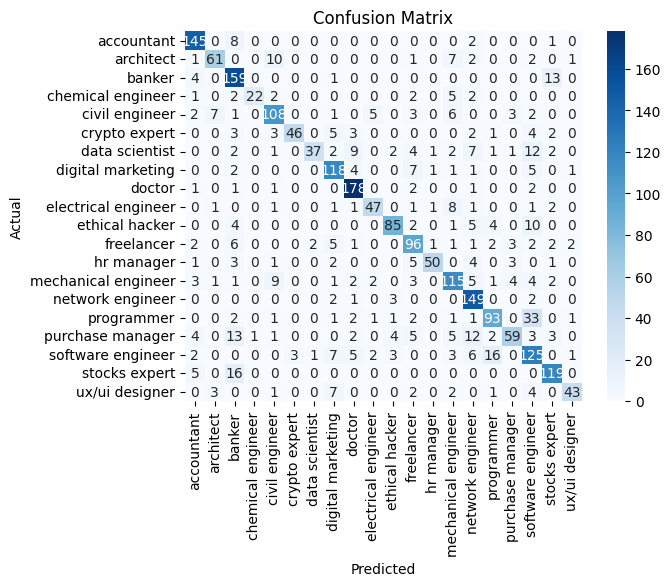

In [18]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(test_labels, npredictions_tfidf)
class_labels = sorted(set(test_labels))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
# CLASS PROBABILITY DISTRIBUTIONS

import plotly.express as px

fig = px.histogram(dfe, x=npredictions_tfidf, color=None, marginal="rug",title='Class Probability Distributions')
fig.show()

In [ ]:
# RANDOM FOREST

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
train_skills, test_skills, train_labels, test_labels = train_test_split(dfe['Skills'], dfe['Job Title'], test_size=0.2, random_state=42)

# Convert the skills into a TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_skills)
X_test_tfidf = tfidf_vectorizer.transform(test_skills)

# Build the Random Forest Classifier
rf_classifier_tfidf = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier with TF-IDF representation
rf_classifier_tfidf.fit(X_train_tfidf, train_labels)

# Make predictions on the test set with TF-IDF representation
predictions_tfidf = rf_classifier_tfidf.predict(X_test_tfidf)

# Evaluate the model with TF-IDF representation
raccuracy_tfidf = accuracy_score(test_labels, predictions_tfidf)
print(f'Accuracy with Random Forest: {raccuracy_tfidf:.2f}')

print("\nClassification Report with Random Forest:")
print(classification_report(test_labels, predictions_tfidf))

print("\nConfusion Matrix with Random Forest:")
print(confusion_matrix(test_labels, predictions_tfidf))


Accuracy with Random Forest: 0.87

Classification Report with Random Forest:
                     precision    recall  f1-score   support

         accountant       0.92      0.96      0.94       156
          architect       0.84      0.84      0.84        85
             banker       0.85      0.90      0.87       177
  chemical engineer       0.82      0.78      0.80        36
     civil engineer       0.90      0.81      0.85       138
      crypto expert       0.98      0.94      0.96        69
     data scientist       0.78      0.71      0.74        83
  digital marketing       0.82      0.86      0.84       140
             doctor       1.00      0.98      0.99       186
electrical engineer       0.86      0.83      0.84        65
     ethical hacker       0.95      0.86      0.90       111
         freelancer       0.85      0.79      0.81       126
         hr manager       0.77      0.96      0.85        70
mechanical engineer       0.90      0.89      0.89       153
   netw

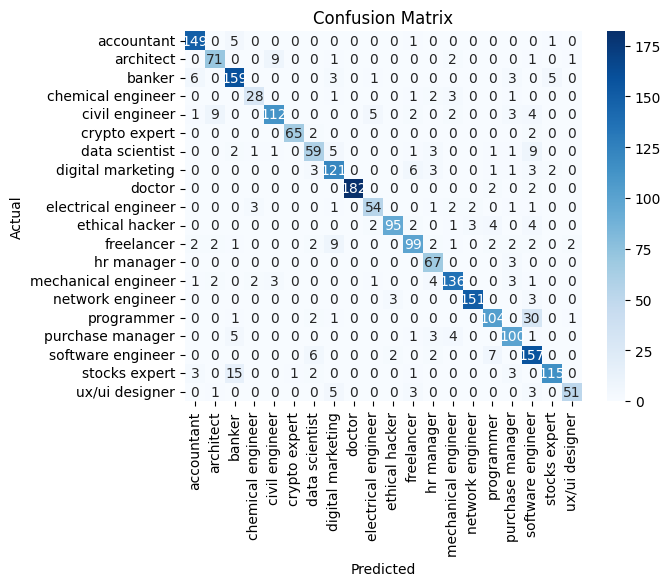

In [21]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(test_labels, predictions_tfidf)
class_labels = sorted(set(test_labels))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# CLASS PROBABILITY DISTRIBUTIONS

import plotly.express as px

fig = px.histogram(dfe, x=predictions_tfidf, color=None, marginal="rug",title='Class Probability Distributions')
fig.show()

In [ ]:
# LOGISTIC REGRESSION

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Load the data
data = pd.read_csv('combined.csv')

# Data Preprocessing
label_encoder = LabelEncoder()
data['Job Title'] = label_encoder.fit_transform(data['Job Title'])

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Skills'])

X = data.drop('Job Title', axis=1)
y = data['Job Title']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Model Evaluation
y_pred = logreg.predict(X_test)

# Print Classification Report and Accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
laccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {laccuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       156
           1       0.88      0.81      0.85        85
           2       0.89      0.84      0.86       177
           3       0.83      0.67      0.74        36
           4       0.91      0.72      0.80       138
           5       0.98      0.71      0.82        69
           6       0.89      0.67      0.77        83
           7       0.82      0.76      0.79       140
           8       1.00      0.91      0.96       186
           9       0.98      0.65      0.78        65
          10       0.97      0.84      0.90       111
          11       0.88      0.66      0.75       126
          12       0.83      0.90      0.86        70
          14       0.85      0.90      0.87       153
          15       0.98      0.92      0.95       157
          16       0.88      0.76      0.81       139
          17       0.86      0.79      0.82       114
    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



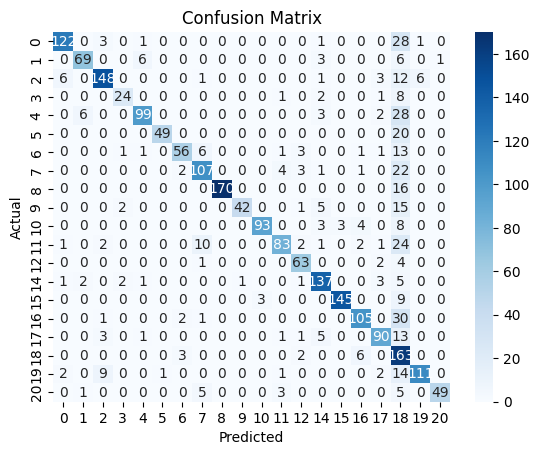

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)
class_names = sorted(set(y_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# RNN

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score

# Load the CSV file
df = pd.read_csv('combined.csv')

# Preprocess the data
encoder = LabelEncoder()
df['Job Title'] = encoder.fit_transform(df['Job Title'])
skills = df['Skills'].values
job_titles = df['Job Title'].values

# Tokenize the skills
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(skills)
X = tokenizer.texts_to_sequences(skills)
X = pad_sequences(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, job_titles, test_size=0.2, random_state=42)

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(units=df['Job Title'].nunique(), activation='sigmoid'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_predict = y_pred_prob.argmax(axis=-1)
rnaccuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {rnaccuracy * 100:.2f}%")


Epoch 1/10
239/239 [==============================] - 9s 26ms/step - loss: 2.0369 - accuracy: 0.4390 - val_loss: 1.1979 - val_accuracy: 0.6779
Epoch 2/10
239/239 [==============================] - 5s 20ms/step - loss: 0.9042 - accuracy: 0.7449 - val_loss: 0.8019 - val_accuracy: 0.7702
Epoch 3/10
239/239 [==============================] - 4s 18ms/step - loss: 0.6544 - accuracy: 0.8058 - val_loss: 0.7252 - val_accuracy: 0.7786
Epoch 4/10
239/239 [==============================] - 5s 21ms/step - loss: 0.5519 - accuracy: 0.8285 - val_loss: 0.6798 - val_accuracy: 0.7917
Epoch 5/10
239/239 [==============================] - 4s 15ms/step - loss: 0.4976 - accuracy: 0.8372 - val_loss: 0.6524 - val_accuracy: 0.7959
Epoch 6/10
239/239 [==============================] - 3s 15ms/step - loss: 0.4658 - accuracy: 0.8445 - val_loss: 0.6422 - val_accuracy: 0.8022
Epoch 7/10
239/239 [==============================] - 5s 21ms/step - loss: 0.4393 - accuracy: 0.8464 - val_loss: 0.6423 - val_accuracy: 0.8027

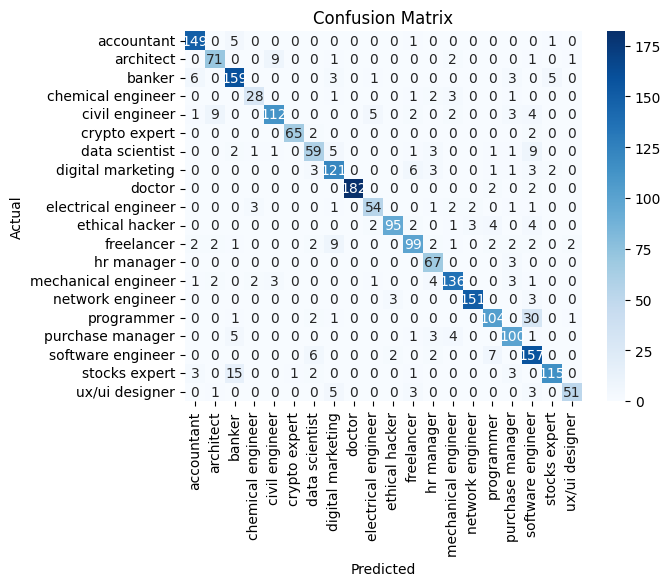

In [26]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(test_labels, predictions_tfidf)
class_labels = sorted(set(test_labels))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
# CLASS PROBABILITY DISTRIBUTIONS

import plotly.express as px

fig = px.histogram(dfe, x=y_predict, color=None, marginal="rug",title='Class Probability Distributions')
fig.show()

In [ ]:
# MLP

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
import numpy as np

# Load the data
data = pd.read_csv('combined.csv')

# Preprocess the data
label_encoder = LabelEncoder()
data['Job Title'] = label_encoder.fit_transform(data['Job Title'])

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Skills'])

X = data.drop('Job Title', axis=1)
y = data['Job Title']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, mlpaccuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {mlpaccuracy * 100:.2f}%')

# Predictions on the test set
y_pred_prob = model.predict(X_test)
y_predictMlp = np.argmax(y_pred_prob, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_predictMlp))


Epoch 1/10
239/239 [==============================] - 2s 8ms/step - loss: 2.6372 - accuracy: 0.2865 - val_loss: 1.9936 - val_accuracy: 0.4990
Epoch 2/10
239/239 [==============================] - 2s 7ms/step - loss: 1.1036 - accuracy: 0.7364 - val_loss: 1.2776 - val_accuracy: 0.7041
Epoch 3/10
239/239 [==============================] - 2s 8ms/step - loss: 0.4396 - accuracy: 0.8924 - val_loss: 1.0954 - val_accuracy: 0.7282
Epoch 4/10
239/239 [==============================] - 2s 7ms/step - loss: 0.2912 - accuracy: 0.9130 - val_loss: 1.0457 - val_accuracy: 0.7398
Epoch 5/10
239/239 [==============================] - 2s 9ms/step - loss: 0.2480 - accuracy: 0.9164 - val_loss: 1.0422 - val_accuracy: 0.7429
Epoch 6/10
239/239 [==============================] - 2s 10ms/step - loss: 0.2289 - accuracy: 0.9151 - val_loss: 1.0248 - val_accuracy: 0.7413
Epoch 7/10
239/239 [==============================] - 2s 6ms/step - loss: 0.2177 - accuracy: 0.9156 - val_loss: 1.0385 - val_accuracy: 0.7392
Epoch

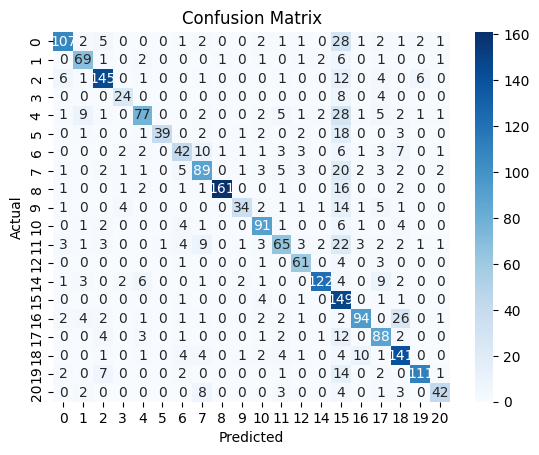

In [29]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_predictMlp)
class_labels = sorted(set(y_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [30]:
import plotly.express as px

fig = px.histogram(dfe, x=y_predictMlp, color=None, marginal="rug",title='Class Probability Distributions')
fig.show()

In [31]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 41.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [32]:
pip install plotly

In [33]:
pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.9 MB/s eta 0:00:00


In [34]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import LabelEncoder
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot

In [36]:
#Accuracy Comparison between the three ML models
colors = ['blue', 'purple','red']
trace1=go.Bar(x=['Naive Bayes Classification','Logistic regression','Random Forest'],
              y=[accuracy_tfidf,laccuracy,raccuracy_tfidf],
              marker=dict(color=colors),
               text=[f'Accuracy: {at*100:.2f}%' for at in [accuracy_tfidf,laccuracy,raccuracy_tfidf]],
    textposition='outside')
layout1 = go.Layout(title='Accuracy Comparison',xaxis=dict(title='Machine learning Models'),yaxis=dict(title='Accuracy'))
data1=[trace1]
fig1 = go.Figure(data=data1, layout=layout1)
iplot(fig1)

In [37]:
#Accuracy Comparison between the two Deep learning models
colors = ['blue', 'purple']
trace1=go.Bar(x=['Naive Bayes Classification','Logistic regression','Random Forest','RNN','MLP'],
              y=[rnaccuracy,mlpaccuracy],
              marker=dict(color=colors),
               text=[f'Accuracy: {at*100:.2f}%' for at in [rnaccuracy,mlpaccuracy]],
    textposition='outside')
layout1 = go.Layout(title='Accuracy Comparison',xaxis=dict(title='Machine learning Models'),yaxis=dict(title='Accuracy'))
data1=[trace1]
fig1 = go.Figure(data=data1, layout=layout1)
iplot(fig1)

In [35]:
#Accuracy Comparison between the 5 ML AND Deep Learning models
colors = ['blue', 'purple','red','pink','grey']
trace1=go.Bar(x=['Naive Bayes Classification','Logistic regression','Random Forest','RNN','MLP'],
              y=[accuracy_tfidf,laccuracy,raccuracy_tfidf,rnaccuracy,mlpaccuracy],
              marker=dict(color=colors),
               text=[f'Accuracy: {at*100:.2f}%' for at in [accuracy_tfidf,laccuracy,raccuracy_tfidf,rnaccuracy,mlpaccuracy]],
    textposition='outside')
layout1 = go.Layout(title='Accuracy Comparison',xaxis=dict(title='Machine learning Models'),yaxis=dict(title='Accuracy'))
data1=[trace1]
fig1 = go.Figure(data=data1, layout=layout1)
iplot(fig1)